## Analysis of google reviews

In [673]:
import pandas as pd
import pickle
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
import string
from sklearn.naive_bayes import MultinomialNB

## import data and drop columns

In [694]:
df = pd.read_csv("../raw_data/reviews_clean.csv")

In [695]:
df.drop(columns=["index","Unnamed: 0", "comment_names"], inplace=True)

In [696]:
df.drop_duplicates(inplace=True)

In [697]:
df.head()

,restaurant_name,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...


In [698]:
df.shape

(13791, 4)

In [699]:
cleaned_df = df.dropna()

In [703]:
cleaned_df.shape

(13683, 4)

In [704]:
df_restaurants = pd.read_csv("../raw_data/restaurants2 - Copy.csv", header=None)
df_restaurants.columns = ["Index", "Restaurant", "type", "sub-type", "Score", "Review_count", "cost", "address", "delivery"]


In [702]:
df_restaurants.shape

(21, 9)

### import data and drop columns 

In [683]:
df = pd.read_csv("../raw_data/reviews_clean.csv")

In [504]:
df.drop(columns=["index","Unnamed: 0", "comment_names"], inplace=True)

In [505]:
df.drop_duplicates(inplace=True)

In [506]:
df.head()

,restaurant_name,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,"Rated 5.0 out of 5,",2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,"Rated 5.0 out of 5,",5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,"Rated 5.0 out of 5,",6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,"Rated 5.0 out of 5,",2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,"Rated 4.0 out of 5,",a week ago,Love the avocado toast! Best cappuccino and th...


In [475]:
df.shape

(13791, 4)

In [472]:
cleaned_df = df.dropna()

In [474]:
cleaned_df.shape

(13683, 4)

### Score column

In [478]:
cleaned_df.comment_ratings.unique()

array(['Rated 5.0 out of 5,', 'Rated 4.0 out of 5,',
       'Rated 1.0 out of 5,', 'Rated 3.0 out of 5,',
       'Rated 2.0 out of 5,'], dtype=object)

In [479]:
def extract_score(series):
    return float(series[6:9])

In [481]:
cleaned_df['comment_ratings'] = cleaned_df['comment_ratings'].apply(extract_score)

/tmp/ipykernel_5479/1627587507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['comment_ratings'] = cleaned_df['comment_ratings'].apply(extract_score)


In [482]:
cleaned_df.head()

,restaurant_name,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,5.0,2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,5.0,5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,5.0,6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,5.0,2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,4.0,a week ago,Love the avocado toast! Best cappuccino and th...


array([[<AxesSubplot:title={'center':'comment_ratings'}>]], dtype=object)

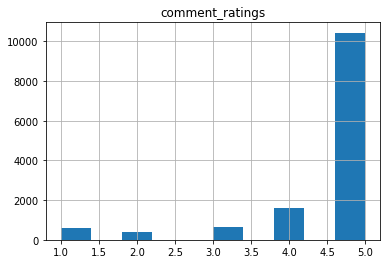

In [483]:
cleaned_df.hist()

### Clean Reviews

In [238]:
def remove_google_trans_comment(series):
    if "(Traduzido pelo Google)" in series:
        return series.replace("(Traduzido pelo Google) ","")
    else:
        return series    

In [239]:
cleaned_df.Review = cleaned_df.Review.apply(remove_google_trans_comment)

/home/jamie/.pyenv/versions/3.8.12/envs/lewagon/lib/python3.8/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [240]:
cleaned_df.reset_index(drop=True)

,Restaurant,Score,When,Review
0,Augusto Lisboa,5.0,2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,5.0,5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,5.0,6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,5.0,2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,4.0,a week ago,Love the avocado toast! Best cappuccino and th...
...,...,...,...,...
1644,Ceia,5.0,3 years ago,(Translated by Google) In a charming space in ...
1645,Ceia,5.0,2 years ago,(Translated by Google) Only one big table. Din...
1646,Ceia,5.0,3 years ago,(Translated by Google) Spectacular space with ...
1647,Ceia,5.0,2 years ago,(Translated by Google) A different experience....


In [241]:
cleaned_df[cleaned_df.Score == 1]

,Restaurant,Score,When,Review
40,Augusto Lisboa,1.0,2 weeks ago,"Proper food, but please create a proper queue...."
244,Crisfama,1.0,a year ago,Big disappointment. The steak I ordered was ra...
273,Alma,1.0,2 months ago,Although Michelin purports to base ratings onl...
291,Alma,1.0,a year ago,Incredibly disappointed. 36 Euro for one cours...
539,Ramiro,1.0,2 weeks ago,This is a complaint comment. We bought four Sp...
640,Belcanto,1.0,a month ago,wrongly awarded michelin stars!. he does not d...
704,Feitoria,1.0,5 months ago,Style over substance. We should have left afte...
705,Feitoria,1.0,a month ago,A pity we could not have dinner there!. My wif...
840,A Cevicheria,1.0,a week ago,Slow and rude service. The bar tender made a g...
844,A Cevicheria,1.0,2 weeks ago,Two hours to wait in line for diner is too muc...


## Score column

In [705]:
cleaned_df.comment_ratings.unique()

array(['Rated 5.0 out of 5,', 'Rated 4.0 out of 5,',
       'Rated 1.0 out of 5,', 'Rated 3.0 out of 5,',
       'Rated 2.0 out of 5,'], dtype=object)

In [706]:
def extract_score(series):
    return float(series[6:9])

In [707]:
cleaned_df['comment_ratings'] = cleaned_df['comment_ratings'].apply(extract_score)

/tmp/ipykernel_5479/1627587507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['comment_ratings'] = cleaned_df['comment_ratings'].apply(extract_score)


In [708]:
cleaned_df.head()

,restaurant_name,comment_ratings,comment_dates,comment_comments
0,Augusto Lisboa,5.0,2 weeks ago,Well worth the small wait to get in of around ...
1,Augusto Lisboa,5.0,5 days ago,Two words: Homemade excellence. This place set...
2,Augusto Lisboa,5.0,6 days ago,"Chic vibe, excellent service, and delicious fo..."
3,Augusto Lisboa,5.0,2 weeks ago,Some of the best brunch I’ve had! Cheery and c...
4,Augusto Lisboa,4.0,a week ago,Love the avocado toast! Best cappuccino and th...


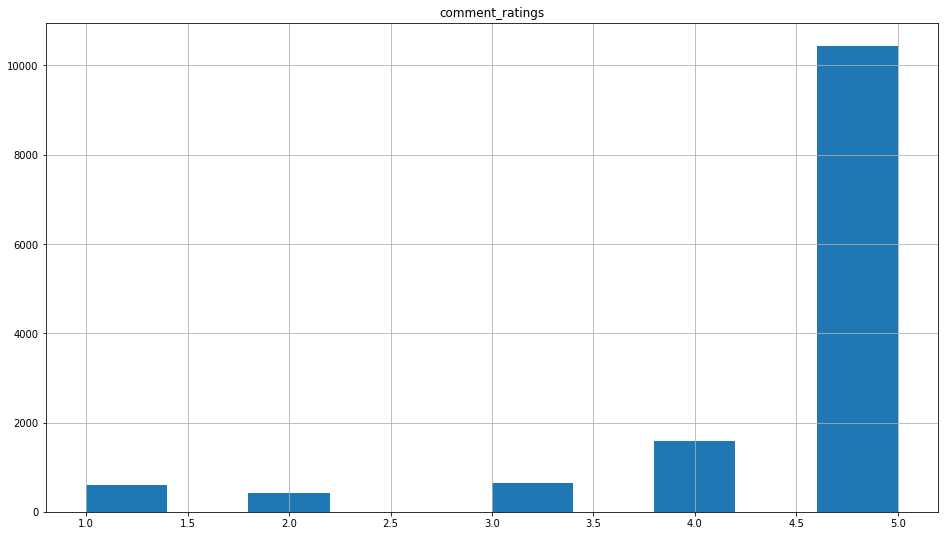

In [710]:
cleaned_df.hist();

## NLP preproc

In [242]:
good_scores = cleaned_df[ cleaned_df.Score >=4]

In [243]:
bad_scores = cleaned_df[ cleaned_df.Score <4]

In [244]:
def clean (text):
    
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
        
    lowercased = text.lower() # Lower Case
    
    #unaccented_string = unidecode.unidecode(lowercased) # remove accents
    
    tokenized = word_tokenize(lowercased) # Tokenize
    
    words_only = [word for word in tokenized if word.isalpha()] # Remove numbers
    
    stop_words = set(stopwords.words('english')) # Make stopword list
    
    without_stopwords = [word for word in words_only if not word in stop_words] # Remove Stop Words
    
    return " ".join(without_stopwords)

In [245]:
good_scores['cleaned_reviews'] = good_scores['Review'].apply(clean)
good_scores.head()

/tmp/ipykernel_5479/1163277420.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_scores['cleaned_reviews'] = good_scores['Review'].apply(clean)


,Restaurant,Score,When,Review,cleaned_reviews
0,Augusto Lisboa,5.0,2 weeks ago,Well worth the small wait to get in of around ...,well worth small wait get around mins well loo...
1,Augusto Lisboa,5.0,5 days ago,Two words: Homemade excellence. This place set...,two words homemade excellence place sets bar e...
2,Augusto Lisboa,5.0,6 days ago,"Chic vibe, excellent service, and delicious fo...",chic vibe excellent service delicious food got...
3,Augusto Lisboa,5.0,2 weeks ago,Some of the best brunch I’ve had! Cheery and c...,best brunch cheery comfortable ambiance well e...
4,Augusto Lisboa,4.0,a week ago,Love the avocado toast! Best cappuccino and th...,love avocado toast best cappuccino banana brea...


In [246]:
bad_scores['cleaned_reviews'] = bad_scores['Review'].apply(clean)
bad_scores.head()

/tmp/ipykernel_5479/3365364549.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_scores['cleaned_reviews'] = bad_scores['Review'].apply(clean)


,Restaurant,Score,When,Review,cleaned_reviews
40,Augusto Lisboa,1.0,2 weeks ago,"Proper food, but please create a proper queue....",proper food please create proper queue inform ...
50,Augusto Lisboa,3.0,a month ago,"It was ok. Surprised the ratings were so high,...",ok surprised ratings high food ok place trendy...
58,Augusto Lisboa,3.0,2 months ago,The waitress who seated us was very nice but t...,waitress seated us nice waitress served us see...
244,Crisfama,1.0,a year ago,Big disappointment. The steak I ordered was ra...,big disappointment steak ordered raw fat refry...
257,Crisfama,2.0,4 years ago,Amazing food... but we were not treated well b...,amazing food treated well boyfriend brazil own...


## Tfidf

In [280]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Tuned TFidfvectorizer
def Tfidf_fit(series):
    vec = TfidfVectorizer(ngram_range = (3,3), min_df=0.01).fit(series)
    return vec

def transform_create_list(series):
    vectors = Tfidf_fit(series).transform(series) # Transform text to vectors

    sum_tfidf = vectors.sum(axis=0) # Sum of tfidf weighting by word

    tfidf_list = [(word, sum_tfidf[0, idx]) for word, idx in     Tfidf_fit(series).vocabulary_.items()]  # Get the word and associated weight

    sorted_tfidf_list =sorted(tfidf_list, key = lambda x: x[1], reverse=True)  # Sort

    return sorted_tfidf_list

In [281]:
Tfidf_fit(good_scores.cleaned_reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.01, ngram_range=(3, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [282]:
transform_create_list(good_scores.cleaned_reviews)[:15]

[('food great service', 16.0)]

In [283]:
Tfidf_fit(bad_scores.cleaned_reviews)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=0.01, ngram_range=(3, 3), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [284]:
transform_create_list(bad_scores.cleaned_reviews)[:15]

[('beautiful food bit', 0.7071067811865476),
 ('food bit rich', 0.7071067811865476),
 ('heard good things', 0.7071067811865476),
 ('good things expected', 0.7071067811865476),
 ('ok food pedantic', 0.7071067811865476),
 ('food pedantic service', 0.7071067811865476),
 ('extremely overrated nothing', 0.5773502691896257),
 ('overrated nothing special', 0.5773502691896257),
 ('nothing special food', 0.5773502691896257),
 ('overpriced delivered ceviche', 0.5),
 ('delivered ceviche good', 0.5),
 ('ceviche good amazing', 0.5),
 ('good amazing recommend', 0.5),
 ('tiny place delicious', 0.5),
 ('place delicious traditional', 0.5)]

### further processing

In [653]:
def cleaned_tokenized(text):
 
    for punctuation in string.punctuation:
        text = text.replace(punctuation, ' ') # Remove Punctuation
      
    extra_stopwords = ['Translated', 'Lisbon', 'Google', 'food', '...more', 'translated', 'google']
    for word in extra_stopwords:
        text = text.replace(word, ' ') # Remove Punctuation  
    
   
    lowercased = text.lower() # Lower Case
        
    tokenized = word_tokenize(lowercased) # Tokenize
    
    stop_words = set(stopwords.words('english'))
    without_stopwords = [word for word in tokenized if not word in stop_words]
    

    
   
    
# #     words_only = [word for word in lowercased if word.isalpha()] # Remove numbers
    
# #     #unaccented_string = unidecode.unidecode(lowercased) # remove accents
    
     
    
    return without_stopwords

In [654]:
reviews_selection = cleaned_df[cleaned_df.comment_ratings >= 4]

In [655]:
text = " ".join(review for review in reviews_selection.comment_comments.astype(str))

In [656]:
token_list = cleaned_tokenized(text) 

In [ ]:
token_list

In [658]:
from collections import Counter
import matplotlib.pyplot as plt
import wordcloud

plt.rcParams["figure.figsize"] = [16, 9]


def create_ngrams(token_list, nb_elements):
    """
    Create n-grams for list of tokens
    Parameters
    ----------
    token_list : list
        list of strings
    nb_elements :
        number of elements in the n-gram
    Returns
    -------
    Generator
        generator of all n-grams
    """
    ngrams = zip(*[token_list[index_token:] for index_token in range(nb_elements)])
    return (" ".join(ngram) for ngram in ngrams)


def frequent_words(list_words, ngrams_number=1, number_top_words=10):
    """
    Create n-grams for list of tokens
    Parameters
    ----------
    ngrams_number : int
    number_top_words : int
        output dataframe length
    Returns
    -------
    DataFrame
        Dataframe with the entities and their frequencies.
    """
    frequent = []
    if ngrams_number == 1:
        pass
    elif ngrams_number >= 2:
        list_words = create_ngrams(list_words, ngrams_number)
    else:
        raise ValueError("number of n-grams should be >= 1")
    counter = Counter(list_words)
    frequent = counter.most_common(number_top_words)
    return frequent


def make_word_cloud(text_or_counter, stop_words=None):
    if isinstance(text_or_counter, str):
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate(text_or_counter)
    else:
        if stop_words is not None:
            text_or_counter = Counter(word for word in text_or_counter if word not in stop_words)
        word_cloud = wordcloud.WordCloud(stopwords=stop_words).generate_from_frequencies(text_or_counter)
    plt.imshow(word_cloud)
    plt.axis("off")
    plt.show()


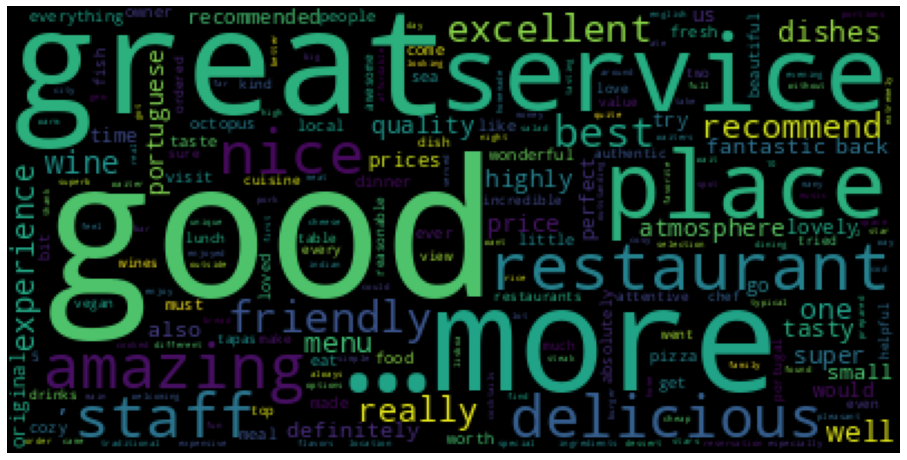

In [659]:
make_word_cloud(token_list, stop_words=stop_words)

In [662]:
frequent_words(token_list, ngrams_number=1, number_top_words=15)

[('good', 3678),
 ('great', 3628),
 ('…more', 3479),
 ('service', 3371),
 ('place', 2473),
 ('restaurant', 2122),
 ('amazing', 1991),
 ('nice', 1914),
 ('staff', 1865),
 ('delicious', 1858),
 ('friendly', 1834),
 ('best', 1784),
 ('excellent', 1494),
 ('really', 1203),
 ('recommend', 1191)]

In [663]:
frequent_words(token_list, ngrams_number=2, number_top_words=15)

[('great service', 485),
 ('friendly staff', 433),
 ('one best', 389),
 ('highly recommend', 353),
 ('original …more', 295),
 ('good service', 293),
 ('highly recommended', 282),
 ('excellent service', 271),
 ('…more good', 262),
 ('…more great', 255),
 ('really good', 249),
 ('friendly service', 244),
 ('service good', 214),
 ('come back', 210),
 ('service great', 204)]

In [ ]:
frequent_words(token_list, ngrams_number=2, number_top_words=15)

[('one best restaurants', 61),
 ('good value money', 60),
 ('great great service', 51),
 ('…more one best', 49),
 ('would definitely recommend', 48),
 ('super friendly staff', 46),
 ('definitely come back', 45),
 ('would highly recommend', 42),
 ('friendly staff great', 40),
 ('one best meals', 39),
 ('staff super friendly', 37),
 ('great service good', 32),
 ('highly recommend place', 31),
 ('original …more good', 31),
 ('good service good', 30)]